# HOUSE SALES PRICING PROJECT

## Overview

Welcome to my analysis. In this analysys I used various regression methods and try to predict the house prices by using them. The reason for choosing regression for the analysis is because it gives more insight about the data. In regression we look at the relation between response and explanatory variables. I will start with simple regression model then complex ones and compare the best model for the dataset. 

## Business Understanding 

In the housing market, the understanding of factors that affect house prices is fundamental for the business.For real estate to advice there clients who are the home buyers and the home sellers they, need to look at the factors affecting the price of the homes in King County, Washington in the United States. We also provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.

## Data Understanding

We will use (House Sales in King County, USA) dataset for our analysis obtained Kaggle. This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.\
The dataset contains 21 columns:\
1 = `id` - Unique identifier for a house\
2 = `date` - Date house was sold\
3 = `price` - Sale price (prediction target)\
4 = `bedrooms` - Number of bedrooms\
5 = `bathrooms` - Number of bathrooms\
6 = `sqft_living` - Square footage of living space in the home\
7 = `sqft_lot` - Square footage of the lot\
8 = `floors` - Number of floors (levels) in house\
9 = `waterfront` - Whether the house is on a waterfront :Includes Duwamish, Elliott Bay, Puget Sound,      Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts\
10 = `view` - Quality of view from house :Includes views of Mt. Rainier, Olympics, Cascades,      Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other\
11 = `condition` - How good the overall condition of the house is. Related to maintenance of house.
  type=r) for further explanation of each condition code\
12 =  `grade` - Overall grade of the house. Related to the construction and design of the house.\
13 = `sqft_above` - Square footage of house apart from basement\
14 = `sqft_basement` - Square footage of the basement\
15 = `yr_built` - Year when house was built\
16 = `yr_renovated` - Year when house was renovated\
17 =  `zipcode` - ZIP Code used by the United States Postal Service\
18 =  `lat` - Latitude coordinate\
19 = `long` - Longitude coordinate\
20 = `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors\
21 =  `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors

### Import the Necessary Packages

In [1]:
# pandas for Data analysis and Data manupulation
import pandas as pd
# numpy for mathematical operations
import numpy as np
# statsmodel for linear regression
import statsmodels.api as sm
import scipy.stats as stats
# train_test_split for splitting dataset
from sklearn.model_selection import train_test_split
from sklearn import linear_model
#import warnings for filtering warnings
import warnings
warnings.filterwarnings('ignore')
# matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

### Import Data

In [2]:
# loading data
data = pd.read_csv("data/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


 ### Descriptive statistic

### Shape

In [3]:
# To identify rows and columns in the dataset.
data.shape

(21597, 21)

It contains 21597 rows and 21 columns.

### Info

In [4]:
# info for description of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We have three data types in our dataset. Waterfront, view and yr_renovated has missing values.

### Describe

In [5]:
# describe to give us the summary statistics for numerical columns
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Head

In [6]:
# To view the first five rows in the dataset.
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Tail

In [7]:
# To view the last five rows in the dataset.
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


### Relationship between variables

In [8]:
# Relationship between the variables
# plt.style.use('Solarize_Light2')
# pd.plotting.scatter_matrix(data, color = '#f25022', figsize = (15,15))
# plt.xticks(rotation = 45);

## Data Preparation / Cleaning

### Null Values

In [9]:
# Checking for null values
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Waterfront, view and yr_renovation are the columns that have null values.

In [10]:
# null values in percentage
null_per = (data.isna().sum() / len(data)) * 100
null_per


id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

Waterfront and yr_renovated has a high percentage while view has a very small percentage of null values.

In [11]:
data.waterfront.unique()

array([nan, 'NO', 'YES'], dtype=object)

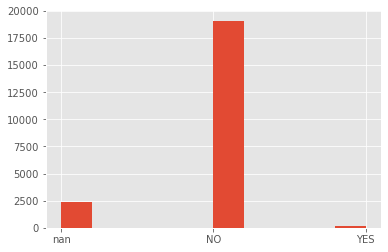

In [12]:
# Dealing with Waterfront null values
# We check first the frequency distribution to determine whether to use mean, median or mode
# to replace missing values
plt.style.use('ggplot')
plt.hist(data['waterfront']);

Since waterfront category is categorical mode will be appropriate to replace the missing values.

In [13]:
wf_mode = data['waterfront'].mode()[0]
wf_mode

'NO'

In [14]:
# replacing the null values with the mode
data['waterfront'].fillna(wf_mode, inplace = True)
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

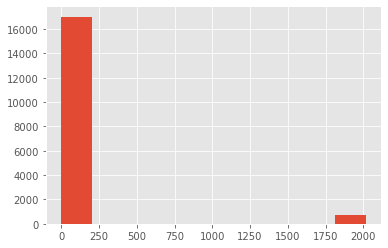

In [15]:
# Dealing with yr_renovated null values
# We check first the frequency distribution to determine whether to use mean, median or mode
# to replace missing values

plt.hist(data['yr_renovated']);

In [16]:
# percentage of unique values
ren = data['yr_renovated'].value_counts()
ren_perc = ren/len(data)*100
ren_perc

0.0       78.765569
2014.0     0.338010
2003.0     0.143538
2013.0     0.143538
2007.0     0.138908
            ...    
1946.0     0.004630
1959.0     0.004630
1971.0     0.004630
1951.0     0.004630
1954.0     0.004630
Name: yr_renovated, Length: 70, dtype: float64

we fill the null values with the median

In [17]:
# dropping the yr_renovated column
data['yr_renovated'].fillna(data['yr_renovated'].median(), inplace = True)
data.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             63
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [18]:
# Dealing with view null values
data.view.unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

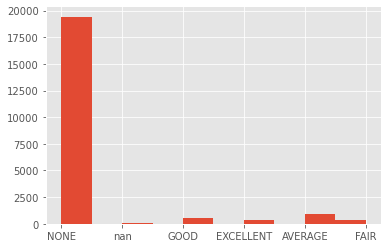

In [19]:
plt.hist(data['view']);

fill the null values with the mode

In [20]:
data['view'].fillna(data['view'].mode()[0], inplace = True)

In [21]:
# Re-Checking for null values
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Missing Values

In [22]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [23]:
# Checking if there is missing values in the placeholders
for i in ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']:
    print('Values for {}:{}\n'.format(i, data[i].unique()))

Values for id:[7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]

Values for date:['10/13/2014' '12/9/2014' '2/25/2015' '2/18/2015' '5/12/2014' '6/27/2014'
 '1/15/2015' '4/15/2015' '3/12/2015' '4/3/2015' '5/27/2014' '5/28/2014'
 '10/7/2014' '1/24/2015' '7/31/2014' '5/29/2014' '12/5/2014' '4/24/2015'
 '5/14/2014' '8/26/2014' '7/3/2014' '5/16/2014' '11/20/2014' '11/3/2014'
 '6/26/2014' '12/1/2014' '6/24/2014' '3/2/2015' '11/10/2014' '12/3/2014'
 '6/13/2014' '12/30/2014' '2/13/2015' '6/20/2014' '7/15/2014' '8/11/2014'
 '7/7/2014' '10/28/2014' '7/29/2014' '7/18/2014' '3/25/2015' '7/16/2014'
 '4/28/2015' '3/11/2015' '9/16/2014' '2/17/2015' '12/31/2014' '2/5/2015'
 '3/3/2015' '8/19/2014' '4/7/2015' '8/27/2014' '2/23/2015' '12/10/2014'
 '8/28/2014' '10/21/2014' '12/7/2014' '6/3/2014' '9/9/2014' '10/9/2014'
 '8/25/2014' '6/12/2014' '9/12/2014' '1/5/2015' '6/10/2014' '7/10/2014'
 '3/16/2015' '11/5/2014' '4/20/2015' '6/9/2014' '3/23/2015' '12/2/2014'
 '12/22/2014' '1/28/2015

sqft_basement has a missing value in placeholder('?'). since almost 60% of sqft_basement values are zero we replace '?' with zero

In [24]:
data['sqft_basement'] = data['sqft_basement'].replace('?', 0.0)
data['sqft_basement'] = data['sqft_basement'].astype(float)
data['sqft_basement'].value_counts(normalize = True)

0.0       0.614900
600.0     0.010048
500.0     0.009677
700.0     0.009631
800.0     0.009307
            ...   
915.0     0.000046
295.0     0.000046
1281.0    0.000046
2130.0    0.000046
906.0     0.000046
Name: sqft_basement, Length: 303, dtype: float64

### Duplicate Values

In [25]:
# checking for duplicates in our dataset
dup_data = data.duplicated().any()
dup_data

False

There are no duplicate values in our dataset.

### Dropping unnecessary Columns

In [26]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [27]:
# dropping columns(id is not neccessary for our analysis)
data = data.drop(['id', 'date'], axis = 1)
data.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Modelling

### Creating dummy variables

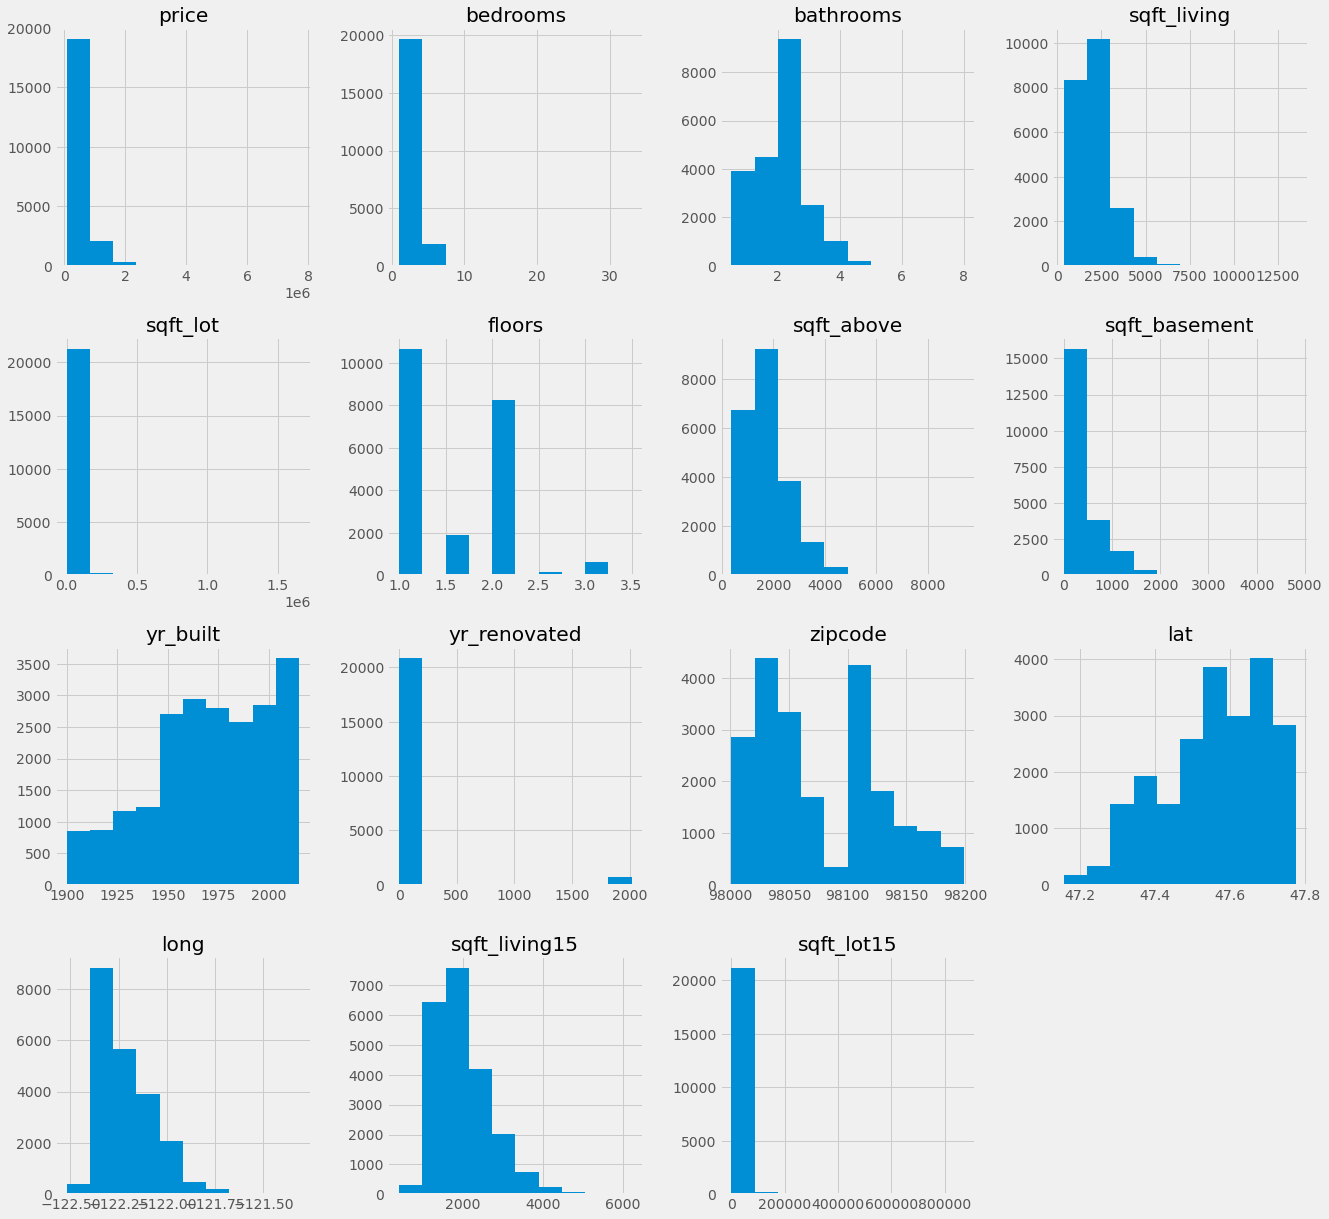

In [28]:
# creating histograms to identify categorical variables
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
data.hist(ax = ax);

In [29]:
# Creating dummy variables for categroical variables
new_data = pd.get_dummies(data, columns=["waterfront", "view", "condition", "grade"], drop_first= True)
new_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,221900.0,3,1.00,1180,5650,1.0,1180,0.0,1955,0.0,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570,7242,2.0,2170,400.0,1951,1991.0,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,1.00,770,10000,1.0,770,0.0,1933,0.0,...,0,0,0,0,0,0,1,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,1050,910.0,1965,0.0,...,0,0,0,0,0,0,0,1,0,0
4,510000.0,3,2.00,1680,8080,1.0,1680,0.0,1987,0.0,...,0,0,0,0,0,0,0,0,1,0


### Checking for Assumptions for Linear Regression

##### 2) Independence

In [30]:
set_1 = list(new_data.corr()[abs(new_data.corr()['price'])>0.3].index)

In [31]:
set_1_data = new_data.loc[:,set_1]
set_1_data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_above,sqft_basement,lat,sqft_living15,view_EXCELLENT,view_NONE,grade_11 Excellent,grade_7 Average
price,1.000000,0.308787,0.525906,0.701917,0.605368,0.321108,0.306692,0.585241,0.303059,-0.356243,0.357589,-0.316053
bedrooms,0.308787,1.000000,0.514508,0.578212,0.479386,0.297229,-0.009951,0.393406,0.033127,-0.079232,0.116596,-0.104791
bathrooms,0.525906,0.514508,1.000000,0.755758,0.686668,0.278485,0.024280,0.569884,0.105789,-0.175884,0.247293,-0.313457
sqft_living,0.701917,0.578212,0.755758,1.000000,0.876448,0.428660,0.052155,0.756402,0.166730,-0.268465,0.345964,-0.358915
sqft_above,0.605368,0.479386,0.686668,0.876448,1.000000,-0.051175,-0.001199,0.731767,0.106178,-0.151909,0.342198,-0.387255
sqft_basement,0.321108,0.297229,0.278485,0.428660,-0.051175,1.000000,0.109853,0.199288,0.148914,-0.268578,0.076299,-0.019855
lat,0.306692,-0.009951,0.024280,0.052155,-0.001199,0.109853,1.000000,0.048679,0.013935,-0.009509,0.039372,-0.040532
sqft_living15,0.585241,0.393406,0.569884,0.756402,0.731767,0.199288,0.048679,1.000000,0.152184,-0.271852,0.309442,-0.378185
view_EXCELLENT,0.303059,0.033127,0.105789,0.166730,0.106178,0.148914,0.013935,0.152184,1.000000,-0.370721,0.080468,-0.078690
view_NONE,-0.356243,-0.079232,-0.175884,-0.268465,-0.151909,-0.268578,-0.009509,-0.271852,-0.370721,1.000000,-0.134261,0.143475


In [32]:

df = set_1_data.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace = True)
# cc for correlation coefficient
df.columns = ['cc']
df.drop_duplicates(inplace=True)
df[(df.cc>.5) & (df.cc<1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(sqft_living15, sqft_living)",0.756402
"(bathrooms, sqft_living)",0.755758
"(sqft_living15, sqft_above)",0.731767
"(price, sqft_living)",0.701917
"(bathrooms, sqft_above)",0.686668
"(price, sqft_above)",0.605368
"(price, sqft_living15)",0.585241
"(bedrooms, sqft_living)",0.578212


The drop independent variable that are highly correlated to each other.

In [33]:
new_data = new_data.drop(['sqft_above','sqft_living15', 'bathrooms'], axis =1)

In [34]:
new_data.shape

(21597, 31)

### Train Test Split

In [35]:
# Train Test split our data for the purposes of model testing
y = new_data['price']
X = new_data.drop(['price'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [36]:
# Price is our dependent variable
# Correlation between Independent variables and dependent variable
new_data.corr()['price']

price                  1.000000
bedrooms               0.308787
sqft_living            0.701917
sqft_lot               0.089876
floors                 0.256804
sqft_basement          0.321108
yr_built               0.053953
yr_renovated           0.117855
zipcode               -0.053402
lat                    0.306692
long                   0.022036
sqft_lot15             0.082845
waterfront_YES         0.264306
view_EXCELLENT         0.303059
view_FAIR              0.092597
view_GOOD              0.182932
view_NONE             -0.356243
condition_Fair        -0.051432
condition_Good        -0.030759
condition_Poor        -0.019886
condition_Very Good    0.057531
grade_11 Excellent     0.357589
grade_12 Luxury        0.291068
grade_13 Mansion       0.211806
grade_3 Poor          -0.005155
grade_4 Low           -0.031618
grade_5 Fair          -0.084549
grade_6 Low Average   -0.209463
grade_7 Average       -0.316053
grade_8 Good           0.004576
grade_9 Better         0.235859
Name: pr

Square footage of living space in the home (sqft_living) has the highest correlation with price of 0.7.

### Model 1 (Baseline Model/ Simple Linear)

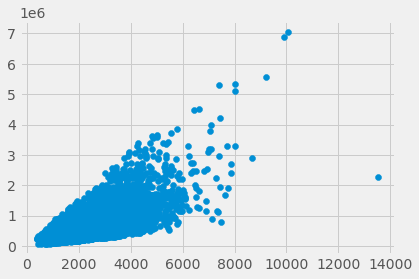

In [37]:
# ploting sqft_living agaist price
plt.scatter(x = X_train['sqft_living'], y = y_train);

In [38]:
y = y_train
X_baseline = X_train['sqft_living']

In [39]:
# Building basement model
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                 1.653e+04
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:18:14   Log-Likelihood:            -2.4010e+05
No. Observations:               17277   AIC:                         4.802e+05
Df Residuals:                   17275   BIC:                         4.802e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.327e+04   4959.861     -8.723      

#### Observations
The model is statistically significant overall, with an F-statistic p-value well below 0.05.\
Our model explains about 49% of the variance in price, the dependent variable.\
The model coefficients (const and sqft_living) are both statistically significant, with t-statistic p-values well below 0.05\
For a sqft_living of 0, our model would predict a price of about -0.0006052.\
An increase of 1 in sqft_living is associated with an increase of about 290 in price.

#### Visualizing Our Model

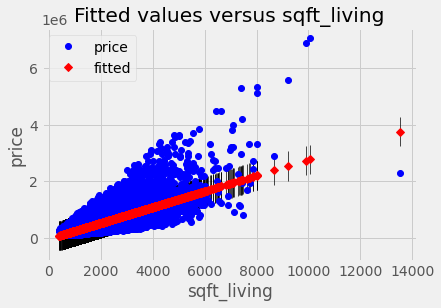

In [40]:
# plot the actual vs. predicted values
sm.graphics.plot_fit(baseline_results, "sqft_living")
plt.show()

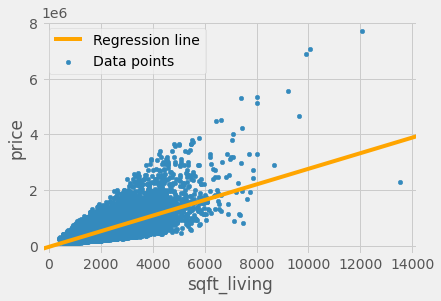

In [41]:
# The regression line

fig, ax = plt.subplots()
data.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="orange")
ax.legend();

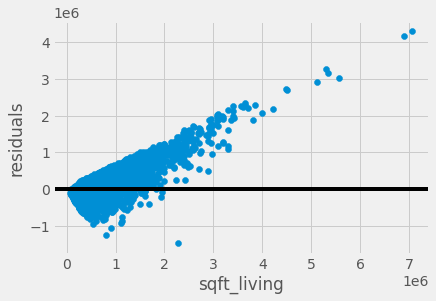

In [42]:
# residuals
fig, ax = plt.subplots()

ax.scatter(y_train, baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

#### Model 1 Validation

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

y_pred = baseline_results.predict(sm.add_constant(X_baseline))
mean_absolute_error(y, y_pred)
# Root Mean Squared Error
mean_squared_error(y, y_pred, squared=False)

262508.1701573905

In [44]:
data_copy = new_data.copy() 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(data_copy)
scaled = pd.DataFrame(scaled,columns = data_copy.columns)
#scaled.head()

In [45]:
y_copy= scaled['price']
X_copy = scaled.drop(['price'], axis = 1)

X_train_copy, X_test_copy, y_train_copy, y_test_copy = train_test_split(X_copy, y_copy, test_size = 0.2, random_state = 10)

In [46]:
X_baseline_copy = X_train_copy['sqft_living']
baseline_copy_model = sm.OLS(y_train_copy,sm.add_constant(X_baseline_copy))
baseline_copy_results = baseline_copy_model.fit()
#baseline_copy_results.summary()

In [47]:
y_copy_base = baseline_copy_results.predict(sm.add_constant(X_baseline_copy))
mean_absolute_error(y_train_copy, y_copy_base)
# Root Mean Squared Error
mean_squared_error(y_train_copy, y_copy_base, squared=False)

0.7145808771498102

### Checking for Assumptions for Linear Regression

#### 1) Normality

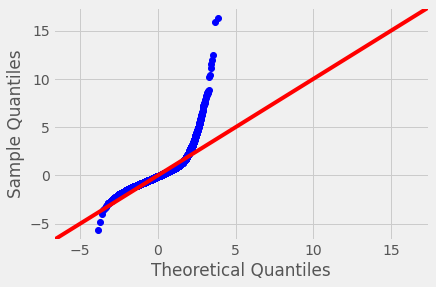

In [48]:
residuals = baseline_results.resid
sm.graphics.qqplot(residuals,dist=stats.norm, line='45', fit=True)
fig.show()



Looking at the p-values from the Jarque-Bera test

In [49]:
from statsmodels.stats.stattools import jarque_bera
jarque_bera(residuals)[1]

0.0

since no normality build a model using those log-transformed features and target, we see some improvement in the distribution of the residuals

In [50]:
y_log = np.log(y)
X_log = np.log(X_baseline)
log_model = sm.OLS(y_log, sm.add_constant(X_log))
log_results = log_model.fit()
print(log_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.440e+04
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:18:16   Log-Likelihood:                -8211.4
No. Observations:               17277   AIC:                         1.643e+04
Df Residuals:                   17275   BIC:                         1.644e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.6975      0.053    126.344      

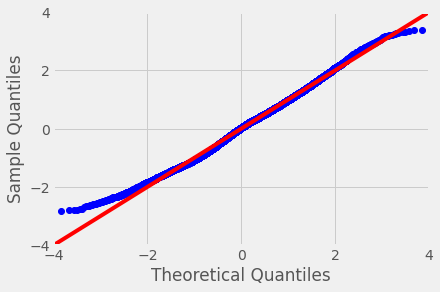

In [51]:
log_residuals = log_results.resid
sm.graphics.qqplot(log_residuals,dist=stats.norm, line='45', fit=True)
fig.show()

We have normalized our model

##### 2) Independence

We have already checked for the independency

#### 3) Normality

In [52]:
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(log_results)

(1.00202161780431, 0.46261657773691656)

The model has a p-value of around 0.46 which is higher than the standard alpha 0.05. A sufficiently low p-value means that we reject the null hypothesis, meaning that the model is not normal. For our model we fail to reject the null hypothesis and conclude the model is normal.

#### 4) Homoscedasticity 

In [53]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

het_goldfeldquandt(y_log, X_log.values.reshape(-1,1), alternative='two-sided')

(1.0073297632223182, 0.7343427177114479, 'two-sided')

we have a p-value of about 0.7, so we fail to reject the null hypothesis at an alpha of 0.05. This means we consider the generated data to be homoscedastic.

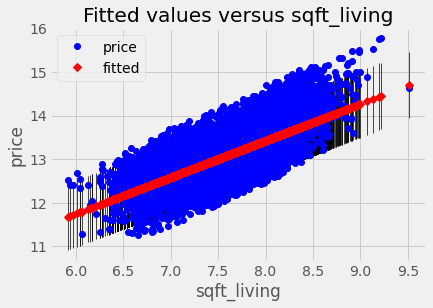

In [54]:
# plot the actual vs. predicted log values
sm.graphics.plot_fit(log_results , "sqft_living")
plt.show()

#### Model 1 Validation

In [55]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_log, log_results.predict(sm.add_constant(X_log)), squared=False)

0.38920013417671073

#### Observations


The model is statistically significant overall, with an F-statistic p-value well below 0.05.\
Our model explains about 46% of the variance in price, the dependent variable.\
The model coefficients (const and sqft_living) are both statistically significant, with t-statistic p-values well below 0.05\
For a sqft_living of 0, our model would predict a price of about 6.6975.\
An increase of 1 in sqft_living is associated with an increase of about 0.8409 in price.

model will be log_y = 6.6975 + 0.8409*log_X

### Model 2 (Multiple Linear Regresion Model)

In [56]:
y = y_train
X_second = X_train

In [57]:
# Building the second model model
second_model = sm.OLS(y, sm.add_constant(X_second))
second_results = second_model.fit()

print(second_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     1526.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:18:17   Log-Likelihood:            -2.3470e+05
No. Observations:               17277   AIC:                         4.695e+05
Df Residuals:                   17246   BIC:                         4.697e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.477e+07    

#### Observations

The model is statistically significant overall, with an F-statistic p-value well below alpha 0.05

The model explains about 73% of the variance in price.

Some of the model coefficients are statistically significant with p-values less than 0.05.

While some coefficients are not statistically significant with p-value more than alpha 0.05 We remove this coefficients that are not statistically significant.

#### Model 2 Validation

In [58]:
y_pred = second_results.predict(sm.add_constant(X_second))
mean_absolute_error(y, y_pred)
# Root Mean Squared Error
mean_squared_error(y, y_pred, squared=False)

192105.88837664633

In [59]:
y_copy= scaled['price']
X_copy = scaled.drop(['price'], axis = 1)

X_train_copy, X_test_copy, y_train_copy, y_test_copy = train_test_split(X_copy, y_copy, test_size = 0.2, random_state = 10)

In [60]:
X_second_copy = X_train_copy
second_copy_model = sm.OLS(y_train_copy,sm.add_constant(X_second_copy))
second_copy_results = second_copy_model.fit()
#baseline_copy_results.summary()

In [61]:
y_copy_second = second_copy_results.predict(sm.add_constant(X_second_copy))
mean_absolute_error(y_train_copy, y_copy_second)
# Root Mean Squared Error
mean_squared_error(y_train_copy, y_copy_second, squared=False)

0.522936844744764

#### Checking for Assumptions for Linear Regression

#### 1) Normality

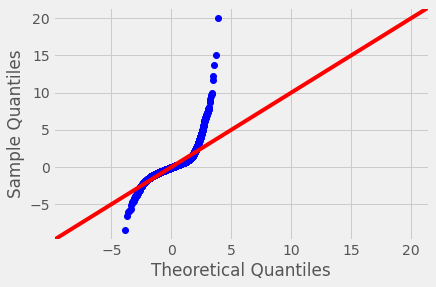

In [62]:
residuals = second_results.resid
sm.graphics.qqplot(residuals,dist=stats.norm, line='45', fit=True)
fig.show()

The model has a p-value of around 1 which is higher than the standard alpha 0.05. A sufficiently low p-value means that we reject the null hypothesis, meaning that the relationship is not linear.
For our model we fail to reject the null hypothesis and conclude the model is linear.

### Model 3: Polynomial Model

In [63]:
X_quad = X_train.copy()
X_quad['sqft_living_sq'] = X_quad['sqft_living']**2
X_quad.head()

,bedrooms,sqft_living,sqft_lot,floors,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,...,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,sqft_living_sq
18147,3,2280,6150,2.0,0.0,1984,0.0,98136,47.5423,-122.385,...,0,0,0,0,0,0,0,1,0,5198400
10218,4,2030,13500,1.0,800.0,1963,0.0,98059,47.4596,-122.066,...,0,0,0,0,0,0,1,0,0,4120900
2688,4,1960,7133,2.0,0.0,2002,0.0,98056,47.4941,-122.190,...,0,0,0,0,0,0,1,0,0,3841600
19140,5,1750,10284,1.0,0.0,1943,0.0,98056,47.5094,-122.182,...,0,0,0,0,1,0,0,0,0,3062500
1523,4,2540,28563,1.0,0.0,1984,0.0,98052,47.7185,-122.114,...,0,0,0,0,0,0,0,0,0,6451600


In [64]:
squared_model = sm.OLS(y, sm.add_constant(X_quad))
poly_results = squared_model.fit()

print(poly_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     1527.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:18:18   Log-Likelihood:            -2.3449e+05
No. Observations:               17277   AIC:                         4.690e+05
Df Residuals:                   17245   BIC:                         4.693e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.78e+07   3

In [65]:
X_baseline
y_pred = poly_results.predict(sm.add_constant(X_quad))
mean_absolute_error(y, y_pred)
# Root Mean Squared Error
mean_squared_error(y, y_pred, squared=False)

189757.24525046235

#### Observations

The model is statistically significant overall, with an F-statistic p-value well below alpha 0.05

The model explains about 73% of the variance in price.


In [66]:
from sklearn.preprocessing import PolynomialFeatures
# Create polynomial features
pr = PolynomialFeatures(2)
X_train_poly = pr.fit_transform(X_train)
# fit the model to the polynomial features
poly_model = sm.OLS(y_train,sm.add_constant(X_train_poly))
poly_results = poly_model.fit()
#poly_results.summary()

In [67]:
data_copy = new_data.copy() 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(data_copy)
scaled = pd.DataFrame(scaled,columns = data_copy.columns)
scaled.head()

,price,bedrooms,sqft_living,sqft_lot,floors,sqft_basement,yr_built,yr_renovated,zipcode,lat,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,-0.866716,-0.402903,-0.980652,-0.228182,-0.915552,-0.649637,-0.544678,-0.188881,1.869645,-0.352894,...,-0.137195,-0.064327,-0.024542,-0.006805,-0.03538,-0.106453,-0.322796,1.186010,-0.624887,-0.371163
1,-0.006252,-0.402903,0.533369,-0.189739,0.937431,0.259847,-0.680850,5.280462,0.879210,1.161376,...,-0.137195,-0.064327,-0.024542,-0.006805,-0.03538,-0.106453,-0.322796,1.186010,-0.624887,-0.371163
2,-0.980773,-1.482493,-1.427234,-0.123139,-0.915552,-0.649637,-1.293626,-0.188881,-0.933473,1.283355,...,-0.137195,-0.064327,-0.024542,-0.006805,-0.03538,-0.106453,3.097927,-0.843163,-0.624887,-0.371163
3,0.173409,0.676687,-0.131057,-0.243878,-0.915552,1.419440,-0.204247,-0.188881,1.084772,-0.283604,...,-0.137195,-0.064327,-0.024542,-0.006805,-0.03538,-0.106453,-0.322796,1.186010,-0.624887,-0.371163
4,-0.082471,-0.402903,-0.436040,-0.169503,-0.915552,-0.649637,0.544700,-0.188881,-0.073850,0.409293,...,-0.137195,-0.064327,-0.024542,-0.006805,-0.03538,-0.106453,-0.322796,-0.843163,1.600289,-0.371163


In [68]:
# Train Test split our data for the purposes of model testing
y_copy= scaled['price']
X_copy = scaled.drop(['price'], axis = 1)
X_train_copy, X_test_copy, y_train_copy, y_test_copy = train_test_split(X_copy, y_copy, test_size = 0.2, random_state = 10)

In [69]:
from sklearn.preprocessing import PolynomialFeatures
# Create polynomial features
pr = PolynomialFeatures(2)
X_train_copy_poly = pr.fit_transform(X_train_copy)
# fit the model to the polynomial features
poly_copy_model = sm.OLS(y_train_copy,sm.add_constant(X_train_copy_poly))
poly_copy_results = poly_copy_model.fit()
poly_copy_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     235.5
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:18:22   Log-Likelihood:                -8853.1
No. Observations:               17277   AIC:                         1.844e+04
Df Residuals:                   16908   BIC:                         2.131e+04
Df Model:                         368                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0199      0.026     -0.761      0.447      -0.071       0.031
x1            -0.0200      0.005     -4.113      0.000      -0.029      -0.010
x2             0.3862      0.010     37.724      0.000       0.366       0.406
x3             0.0506      0.015      3.465      0.001       0.022       0.079
x4            -0.0327      0.007     -4.889      0.000      -0.046      -0.020
x5            -0.0252      0.007     -3.568      0.000      -0.039      -0.011
x6            -0.0348      0.007     -5.040      0.000      -0.048      -0.021
x7            -1.1048      0.457     -2.417      0.016      -2.001      -0.209
x8            -0.1457      0.005    -26.582      0.000      -0.156      -0.135
x9             0.2302      0.004     54.145      0.000       0.222       0.239
x10           -0.1522      0.007    -23.300      0.000      -0.165      -0.139
x11           -0.0173      0.013     -1.346      0.178      -0.043       0.008
x12            0.0045      0.002      2.046      0.041       0.000       0.009
x13            0.0033      0.003      1.018      0.309      -0.003       0.010
x14            0.0026      0.003      0.775      0.438      -0.004       0.009
x15            0.0034      0.004      0.829      0.407      -0.005       0.012
x16           -0.0118      0.008     -1.393      0.164      -0.028       0.005
x17            0.0018      0.002      0.763      0.446      -0.003       0.006
x18            0.0283      0.013      2.207      0.027       0.003       0.053
x19            0.0007      0.001      0.720      0.472      -0.001       0.003
x20            0.0108      0.007      1.458      0.145      -0.004       0.025
x21            0.0039      0.004      1.104      0.269      -0.003       0.011
x22            0.0012      0.002      0.707      0.480      -0.002       0.004
x23            0.0004      0.001      0.650      0.516      -0.001       0.002
x24            0.0001      0.000      0.762      0.446      -0.000       0.000
x25            0.0007      0.001      0.704      0.482      -0.001       0.002
x26            0.0013      0.003      0.465      0.642      -0.004       0.007
x27           -0.0118      0.008     -1.455      0.146      -0.028       0.004
x28           -0.1627      0.013    -12.431      0.000      -0.188      -0.137
x29           -0.0250      0.013     -1.875      0.061      -0.051       0.001
x30            0.0097      0.009      1.071      0.284      -0.008       0.028
x31            0.0021      0.001      3.286      0.001       0.001       0.003
x32           -0.0284      0.007     -3.811      0.000      -0.043      -0.014
x33           -0.0153      0.008     -1.923      0.055      -0.031       0.000
x34            0.0243      0.006      4.093      0.000       0.013       0.036
x35            0.0073      0.005      1.402      0.161      -0.003       0.017
x3

#### standardized mean squared error

In [70]:
y_copy_pred = poly_copy_results.predict(sm.add_constant(X_train_copy_poly))
mean_absolute_error(y_train_copy, y_copy_pred)
# Root Mean Squared Error
mean_squared_error(y_train_copy, y_copy_pred, squared=False)

0.4039295990280933

#### Linearity

In [71]:
linear_rainbow(poly_results)

(0.9437332945125583, 0.996156780987701)

The model has a p-value of around 1 which is higher than the standard alpha 0.05. A sufficiently low p-value means that we reject the null hypothesis, meaning that the relationship is not linear.
For our model we fail to reject the null hypothesis and conclude the model is linear.

#### Observations

The model is statistically significant overall, with an F-statistic p-value well below alpha 0.05

The model explains about 83% of the variance in price.

### Relationship between home renovation and the price


In [72]:
y = y_train
X_reno = X_train['yr_renovated']

In [73]:
# Building basement model
reno_model = sm.OLS(y, sm.add_constant(X_reno))
reno_results = reno_model.fit()

print(reno_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     227.8
Date:                Sat, 01 Oct 2022   Prob (F-statistic):           3.77e-51
Time:                        12:18:24   Log-Likelihood:            -2.4578e+05
No. Observations:               17277   AIC:                         4.916e+05
Df Residuals:                   17275   BIC:                         4.916e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5.326e+05   2824.731    188.533   

#### Observations

The model is statistically significant overall, with an F-statistic p-value well below 0.05.\
Our model explains about 1.3% of the variance in price, the dependent variable.\
The model coefficients (const and yr_renovated) are both statistically significant, with t-statistic p-values well below 0.05\
For a sqft_living of 0, our model would predict a price of about 0.000005326.\
An increase of 1 in yr_renovated is associated with an increase of about 115 in price.

### Conclusions

Polynomial model is the best model to fit for predicting the price of houses.